**Tabla de Contenidos**<a id='toc0_'></a>    
- 1. [Proyecto Integrado](#toc1_)    
  - 1.1. [Preparación de los datos](#toc1_1_)    
    - 1.1.1. [Corregir errores](#toc1_1_1_)    
  - 1.2. [Análisis de los datos](#toc1_2_)    
  - 1.3. [Usuarios por región](#toc1_3_)    
  - 1.4. [Pruebas de hipótesis](#toc1_4_)    
    - 1.4.1. [Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.](#toc1_4_1_)    
    - 1.4.2. [Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.](#toc1_4_2_)    
  - 1.5. [Conclusión general](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Proyecto Integrado](#toc0_)

En este proyecto se realizará el análisis de los datos de venta de videojuegos, en el cuál podremos observar distintos datos de información sobre cada uno de ellos. Se hará la limpieza de los datos, se organizaran y finalmente se tendrán en cuenta para realizar las pruebas de algunas hipótesis planteadas.

## 1.1. <a id='toc1_1_'></a>[Preparación de los datos](#toc0_)

Primero comenzaremos cargando las librerías que se van a utilizar y leyendo el DataFrame, posterior a esto se hará el análisis para encontrar posibles errores en los tipos de datos, o en la información de las columnas.

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as sts

In [2]:
df = pd.read_csv("datasets/games.csv")
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 1.1.1. <a id='toc1_1_1_'></a>[Corregir errores](#toc0_)

In [3]:
# Ver la información del DataFrame
print(df.info())
# Comprobar duplicados
print()
print("Cantidad de Duplicados:",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Cantidad de Duplicados: 0


In [4]:
# Cambiar los nombres de las columnas
dic = {}
for col in df.columns:
    dic[col] = col.lower()
df = df.rename(columns=dic)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# Ver cantidad de datos vacíos
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [6]:
# Rellenar valores nulos
df['name'].fillna('Unkwnown', inplace=True)
df['genre'].fillna('Unkwnown', inplace=True)
df['rating'].fillna('Unkwnown', inplace=True)
df['year_of_release'].fillna(0, inplace=True)
df['critic_score'].fillna(0, inplace=True)
df['user_score'].fillna('0', inplace=True) # Se va a cambiar el tipo de dato después
# Ver cantidad de datos vacíos
print(df.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


He decidido conservar los datos que poseen valores nulos, pues aunque no parecieran tener un impacto muy significativo dentro de los análisis próximos, puede que ayuden a observar con mejor precisión el comportamiento de la información. En el caso de las columnas `year_of_release`, `critic_score` y `user_score` las coloqué en 0, dado que no me parecío que rellenar los valores haciendo la mediana o promedio acercaría el valor a uno real, ya que cada juego puede tener valor completamente distinto e independiente; aunque no estoy muy seguro de que este enfoque sea correcto. En las otras columnas coloqué el valor `Unknown`, dado que la información también es desconocida.

In [7]:
# Reemplazar valores TBD en columna user_score
df.loc[df['user_score']=='tbd', 'user_score'] = df['critic_score']/10

Al revisar la columna `user_score` encontré que contenía el valor tbd (To Be Determinated), por ello la columna tenía un tipo de dato incorrecto. Para resolverlo, creí que la mejor manera era poniendo el mismo valor que tenían las filas en la columna `critic_score`, así ambos tienen el mismo valor.

In [8]:
# Cambiar tipos de datos
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

He cambiado el tipo de datos de dos columnas: `year_of_release` dado que el tipo original era `float` y parece mejor que el tipo de dato sea `int` para describir el año de lanzamiento del juego. La otra columna `user_score` tenía tipo `str` dado que había filas con un valor a determinar, para cambiar esto tomé el valor de la columna `critic_score` y lo reemplacé para cambiar el tipo de dato a `float`

Ahora agregaré una columna extra al DataFrame con el cálculo de las ventas totales, es decir, la suma de las ventas en todas las regiones para cada juego.

In [9]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unkwnown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unkwnown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,Unkwnown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,Unkwnown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Unkwnown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,Unkwnown,0.01


## 1.2. <a id='toc1_2_'></a>[Análisis de los datos](#toc0_)

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

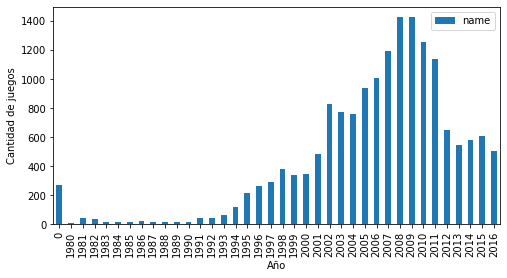

In [10]:
group_year = df.groupby('year_of_release', as_index=False).count()[['year_of_release', 'name']]
group_year.plot(x='year_of_release', y='name',ylabel='Cantidad de juegos', xlabel='Año', kind='bar', figsize=(8, 4))
plt.show()

En este caso, podemos observar que la cantidad de juegos lanzados por año ha ido en aumento hasta los puntoas más altos que son 2008 y 2009, también se puede ver que la cantidad disminuye considerablemente posterior al año 2011. Así como se puede ver una cantidad de más de 200 juegos de los que desconocemos el año de lanzamiento (año 0).

- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

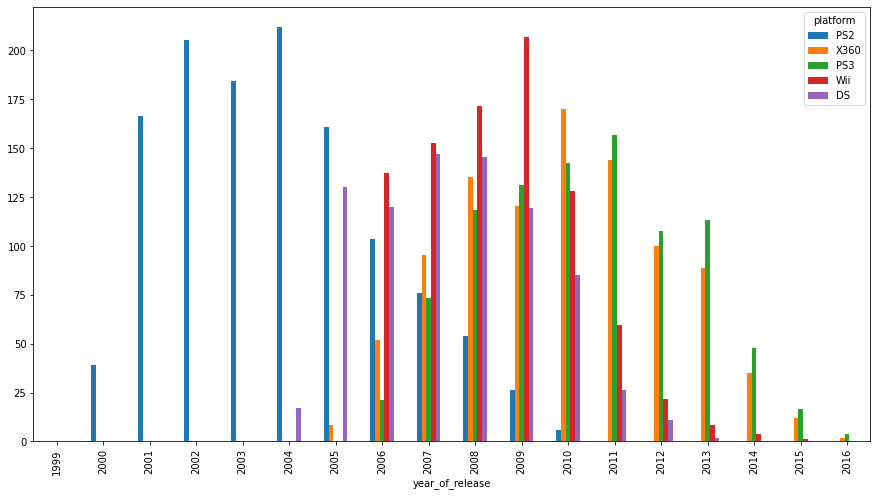

In [11]:
# Agrupar por plataformas y ordenar por ventas totales:
platforms_by_sales = df.groupby('platform', as_index=False).sum().sort_values('total_sales', ascending=False).reset_index(drop=True)

# Obtener las 5 plataformas con mayor numero de ventas totales:
platforms = platforms_by_sales['platform'].head().unique()

# Tabla dinámica de las ventas por plataforma en cada año
sales_by_year_p = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')#.fillna(0)

# Mostrar solamente las 5 plataformas con mayor número de ventas
sales_by_year_pt = sales_by_year_p.loc[1999:, platforms]
sales_by_year_pt.plot(kind='bar', figsize=(15,8))
plt.show()
# display(platforms_by_sales)#sort_values(by='total_sales', ascending=False).head(20)

Podemos observar que el mayor número de ventas comenzó a partir del año 2000 en la plataforma PS2, y nuevas plataformas emergen a partir del 2004, con ello podemos pensar que es apartir de 5 años que surgen nuevas plataformas en las que las personas empiezan a centrar su compra de juegos. También podemos ver que las diversas plataformas cuentan con un número significativo de diferencia entre sus ventas, por lo que las ventas variarán en cuestión de la plataforma.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

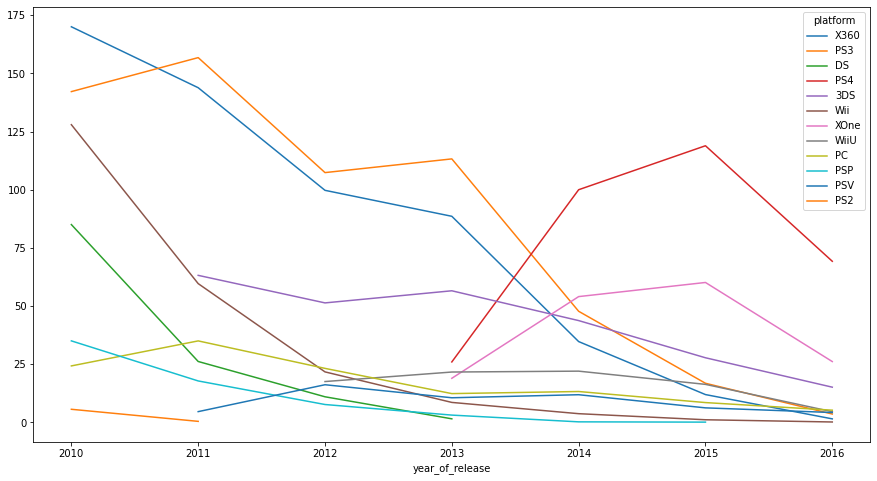

In [12]:
# Observar los datos para juegos lanzados desde el 2010
plat = df[df['year_of_release']>=2010]['platform'].unique()
# Acortar la grafica sólo para mostrar datos de las plataformas con juegos después del 2010
sales_by_year_t = sales_by_year_p.loc[2010:, plat]
sales_by_year_t.plot(kind='line', figsize=(15,8))
plt.show()

Por los datos comprendidos entre 2015 a 2016, podemos pensar que las nuevas plataformas y las que tienen mayor número de ventas para el año 2017 pueden ser PS4, XOne y 3DS, pues el resto parece estar volviendose de menor consumo, por lo tanto, nos enfocaremos en este periodo para hacer el análisis.

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [13]:
# Buscar los lideres en ventas para generaciones posteriores,a partir del 2015
display( df[df['year_of_release']>=2015].groupby('platform').sum().sort_values('total_sales', ascending=False) )

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS4,606679,63.86,83.54,12.05,28.70,13300.0,1315.9,188.15
XOne,336592,50.30,28.10,0.18,7.71,8244.0,809.6,86.29
3DS,266026,10.31,7.39,23.55,1.67,2070.0,247.6,42.92
WiiU,84644,8.86,6.49,4.12,1.48,2000.0,211.9,20.95
PS3,223703,5.66,7.30,4.97,2.49,63.0,194.3,20.42
PC,209614,3.72,9.10,0.00,0.95,5945.0,528.9,13.77
X360,96733,8.05,4.21,0.00,1.22,0.0,167.1,13.48
PSV,393010,0.54,1.08,8.41,0.47,1746.0,288.1,10.50
Wii,10076,0.49,0.73,0.00,0.10,0.0,0.0,1.32


Por la información obtenida por medio de los gráficos y de la tabla mostrada, podemos pensar que son las plataformas PS4, XOne y 3DS las que serían potencialmente más rentables, sin embargo, se puede observar una notable reducción en las ventas del resto de consolas con respecto a los años pasados.

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

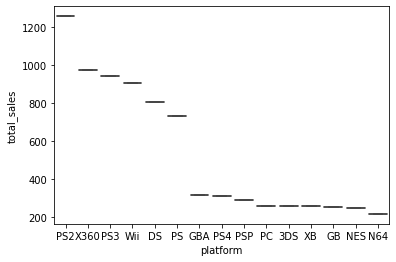

In [14]:
# Agrupar las ventas por plataforma
box_df = df[['platform', 'total_sales']].groupby('platform', as_index=False).sum().sort_values('total_sales', ascending=False).head(15)
#sns.boxplot(data=box_df, orient='h' )
#display(box_df)
sns.boxplot(  y=box_df['total_sales'], x=box_df['platform'] )
plt.show()

He realizado un diagrama de caja nos muestra que hay una media de ventas aproximada a 200, con valores minimos y máximos muy cercanos a los cuartiles. También podemos observar varios valores atípicos, muy por encima del promedio de la muestra. Pero se puede concluir que las ventas por plataforma suelen generar cerca de $200 en ventas.

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

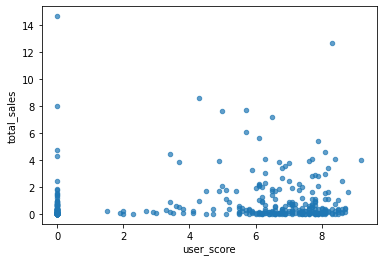

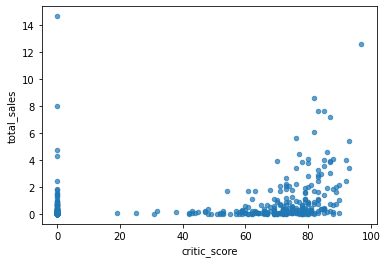

In [15]:
# Grafico de dispersion para la plataforma PS4 respecto a las reseñas
df_plat = df[df['platform']=='PS4']
df_plat.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7)
df_plat.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7)
plt.show()

Gracias a los gráficos de dispersión se puede observar que existe una muy ligera correlación positiva entre las reseñas, tanto de usuarios como de críticos, aunque no es una relación extremadamente fuerte, si es positiva. La relación es más fuerte en el aspecto de las reseñas de la crítica especializada, más que de los usuarios. Elegí la plataforma PS4 para hacer el análisis, pues es la que más ventas obtuvo en los últimos años.

- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

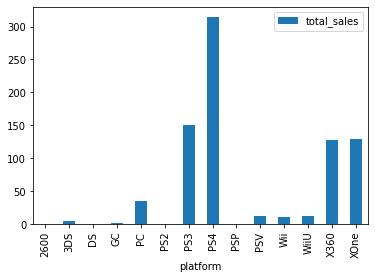

In [16]:
# Obtener los juegos que se analizaron en la plataforma PS4
games_ps4 = df_plat['name'].unique()
# Buscar los mismos juegos en otras plataformas
games_total = df[df['name'].isin(games_ps4)].groupby('platform', as_index=False).sum()
# Visualizar el número de ventas de los juegos en otras plataformas
games_total.plot(x='platform', y='total_sales', kind='bar')
plt.show()
#display(games_total)

Se puede observar que los juegos que más se vendieron en la plataforma PS4 también fueron mayormente vendidos en la plataforma PS3, seguidos por las plataformas X360 y XOne. En el resto de plataformas las ventas de los mismos juegos es mucho menor.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [17]:
# Obtener los generos que generaron más ventas totales
genre_games = df.groupby('genre', as_index=False).sum().sort_values('total_sales', ascending=False).reset_index(drop=True)
display(genre_games[['genre','total_sales']])
# Los años de lanzamiento de los generos más rentables
year_best_genres = df[df['genre'].isin(genre_games['genre'])].groupby('year_of_release', as_index=False).count().sort_values('total_sales', ascending=False).reset_index(drop=True)
display(year_best_genres[['year_of_release','name']].head(13))

,genre,total_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


Ya se han obtenido los generos que han generado más ganancias y se observa que la mayoría de ellos fueron lanzados después del 2005 y en su mayoría antes del 2011. Por los análisis anteiroes se puede decir que estos fueron los años en los que hubo mayor número de ventas en distintas plataformas. Por lo que puede llegarse a pensar que son los generos de Acción y Deportes los que más se pueden vender para las consolas PS4 o XOne en los años posteriores.

## 1.3. <a id='toc1_3_'></a>[Usuarios por región](#toc0_)

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [18]:
# Buscar los lideres en ventas por region
def sales_reg(region):
    return df.groupby('platform').sum().sort_values(region, ascending=False)
# Región NA
na_sales = sales_reg('na_sales')
print('NA SALES')
display( na_sales.head() )
# Región EU
print('EU SALES')
eu_sales = sales_reg('eu_sales')
display( eu_sales.head() )
# Región JP
print('JP SALES')
jp_sales = sales_reg('jp_sales')
display( jp_sales.head() )

NA SALES


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
X360,2476173,602.47,270.76,12.43,85.76,62853.0,6628.0,971.42
PS2,4263750,583.84,339.29,139.20,193.44,89208.0,10315.3,1255.77
Wii,2583531,496.90,262.21,69.33,79.07,36752.0,4268.1,907.51
PS3,2626158,393.49,330.29,80.19,135.68,57714.0,6069.6,939.65
DS,4259361,382.40,188.89,175.57,59.26,45717.0,5047.5,806.12


EU SALES


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS2,4263750,583.84,339.29,139.20,193.44,89208.0,10315.3,1255.77
PS3,2626158,393.49,330.29,80.19,135.68,57714.0,6069.6,939.65
X360,2476173,602.47,270.76,12.43,85.76,62853.0,6628.0,971.42
Wii,2583531,496.90,262.21,69.33,79.07,36752.0,4268.1,907.51
PS,2377627,336.52,213.61,139.82,40.91,14303.0,1501.2,730.86


JP SALES


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
DS,4259361,382.40,188.89,175.57,59.26,45717.0,5047.5,806.12
PS,2377627,336.52,213.61,139.82,40.91,14303.0,1501.2,730.86
PS2,4263750,583.84,339.29,139.20,193.44,89208.0,10315.3,1255.77
SNES,476529,61.23,19.04,116.55,3.22,0.0,0.0,200.04
3DS,1030721,83.49,61.48,100.67,13.36,11273.0,1243.9,259.00


Se pueden observar las diferencias claras en cuanto a las plataformas que más han generado ingresos de acuerdo a cada región de las especificadas, pues en ningún caso coinciden en la mayoría de ganancias para algúna plataforma específica. También observamos que difieren bastante las ganancias obtenidas en cada una de estas regiones, siendo en la región NA la que tiene el mayor número de ventas en comparación a las otras.

- Los cinco géneros principales. Explica la diferencia.

In [19]:
# Buscar los generos lideres en ventas por region
def genre_reg(region):
    return df.groupby('genre').sum().sort_values(region, ascending=False)
# Región NA
na_gens = genre_reg('na_sales')
print('NA SALES')
display( na_gens.head()['na_sales'] )
# Región EU
print('EU SALES')
eu_gens = genre_reg('eu_sales')
display( eu_gens.head()['eu_sales'] )
# Región JP
print('JP SALES')
jp_gens = genre_reg('jp_sales')
display( jp_gens.head()['jp_sales'] )

NA SALES


genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

EU SALES


genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

JP SALES


genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

En esta ocasion sí se puede hallar una gran similitud entre los géneros preferidos por región, pues de los 5 géneros más vendidos, las regiones EU y NA comparten 4. Aunque en una preferencia distinta, algunos de estos generos también se pueden encontrar entre los más vendidos de la región JP. Por lo que se puede decir, que los generos: Acción, Deportes y Misc, serán los que mayor cantidad de ingresos pueden generar en las 3 regiones.

- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [20]:
def rating_sales(region):
    return df.groupby('rating').sum().sort_values(region, ascending=False)
# Región NA
na_rate = rating_sales('na_sales')
print('NA SALES')
display( na_rate.head()['na_sales'] )
# Región EU
print('EU SALES')
eu_rate = rating_sales('eu_sales')
display( eu_rate.head()['eu_sales'] )
# Región JP
print('JP SALES')
jp_rate = rating_sales('jp_sales')
display( jp_rate.head()['jp_sales'] )

NA SALES


rating
E           1292.99
Unkwnown    1242.46
T            759.75
M            748.48
E10+         353.32
Name: na_sales, dtype: float64

EU SALES


rating
E           710.25
Unkwnown    613.83
M           483.97
T           427.03
E10+        188.52
Name: eu_sales, dtype: float64

JP SALES


rating
Unkwnown    841.96
E           198.11
T           151.40
M            64.24
E10+         40.20
Name: jp_sales, dtype: float64

Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones. Se puede observar que las regiones NA y EU coinciden en los primeros 2 ratings con mayoría de ventas y teniendo el menor número en ventas los juegos clasificados como E10+.

## 1.4. <a id='toc1_4_'></a>[Pruebas de hipótesis](#toc0_)

Establece tu mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.

- Qué criterio utilizaste para probar las hipótesis y por qué.

### 1.4.1. <a id='toc1_4_1_'></a>[Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.](#toc0_)

Hipótesis Nula: Las calificaciones promedio de los usuarios en las plataformas Xbox One y PC son las mismas.

Hipótesis Alternativa: Las calificaciones promedio de los usuarios en las plataformas Xbox One y PC son diferentes.

He elegido estas dos hipótesis para comprobar si las calificaciones en promedio son las mismas para dos plataformas específicas, la hipótesis alternativa se ha elegido en función en la hipótesis nula. Dado que se requiere hacer la comparación entre dos poblaciones diferentes, he optado por utilizar la prueba para valores independientes: `ttest`.

In [21]:
# Prueba la hipótesis:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

sample_1 = df[df['platform']=='XOne']['user_score']
sample_2 = df[df['platform']=='PC']['user_score']
alpha = 0.05 # el nivel de significancia estadística crítica, si el valor p es menor que alpha, rechazamos la hipótesis

print('Varianza plataforma XOne:', np.var(sample_1), "Varianza plataforma PC:", np.var(sample_2))
print(sts.levene(sample_1, sample_2))

results = sts.ttest_ind(sample_1, sample_2, equal_var=False) 
print('valor-p:',results.pvalue,'\n')

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')

Varianza plataforma XOne: 9.389805438541856 Varianza plataforma PC: 10.013672918889062
LeveneResult(statistic=0.007879200458610286, pvalue=0.9292833651034925)
valor-p: 0.0010728118414519362 

Se rechaza la hipótesis nula


He realizado primero la prueba de Levene, que ayudará a indicar si las varianzas de las poblaciones son iguales, en este caso se ha obtenido un número mayor al umbral alpha, lo que indica que las varianzas pueden llegar a ser similares.

Al realizar la prueba, hemos obtenido un valor p más bajo que el valor alpha. Esto nos indica que es baja la probabilidad de encontrar valores similares para las dos plataformas que estamos comparando y por lo tanto, rechazamos la hipótesis nula.

### 1.4.2. <a id='toc1_4_2_'></a>[Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.](#toc0_)

Hipótesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis Alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

He elegido estas dos hipótesis que ayudan a comprobar si las calificaciones en promedio son las mismas para dos generos específicas, la hipótesis alternativa se ha elegido en función en la hipótesis nula. Dado que se requiere hacer la comparación entre dos poblaciones diferentes, he optado por utilizar la prueba para valores independientes: `ttest`.

In [22]:
# Prueba la hipótesis:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

sample_1 = df[df['genre']=='Action']['user_score']
sample_2 = df[df['genre']=='Sports']['user_score']
alpha = 0.05 # el nivel de significancia estadística crítica, si el valor p es menor que alpha, rechazamos la hipótesis

print('Varianza género Acción:', np.var(sample_1), "Varianza género Deportes:", np.var(sample_2))
print(sts.levene(sample_1, sample_2))

results = sts.ttest_ind(sample_1, sample_2, equal_var=True) 
print('valor-p:',results.pvalue,'\n')

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')

Varianza género Acción: 12.69097237122892 Varianza género Deportes: 12.932367138367063
LeveneResult(statistic=11.111170834269762, pvalue=0.000863550661349195)
valor-p: 0.0002613330924977687 

Se rechaza la hipótesis nula


Esta vez, al realizar la prueba de Levene para calcular las varianzas iguales, se obtiene un valor menor al del umbral alpha, indicando que las varianzas pueden tener una diferencia notable.

Al realizar la prueba, el valor p es demasiado bajo, por lo que será más difícil hallar valores que se acerquen a lo que estamos buscando, por lo tanto se rechaza la hipótesis nula.

Por estas dos hipótesis podemos pensar que no hay muchas similitudes entre los promedios de las críticas de los usuarios en cuanto a las plataformas o los géneros elegidos. 

## 1.5. <a id='toc1_5_'></a>[Conclusión general](#toc0_)

En conclusión, si todos mis procedimientos fueron correcto, puedo decir que las plataformas en crecimiento son XOne y PS4, cada nueva plataforma suele durar aproximadamente 10 años. La región que produce más ingresos es la región de NA, en términos generales. No parece haber una relación sumamente fuerte entre las reseñas y las ventas, sin embargo, se deben tener en cuenta pues la relación que llegan a tener es positiva, así que puede verse afectada la venta de un juego según las reseñas. Finalmente, gracias a las hipótesis podemos decir, que es muy poco probable encontrar similitudes de reseñas de usuarios entre distintas plataformas o distintos generos.